In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
df_index = pd.read_csv('economic_index.csv')

In [58]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [59]:
# dropping unneccesaary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1, inplace=True)

In [60]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [61]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

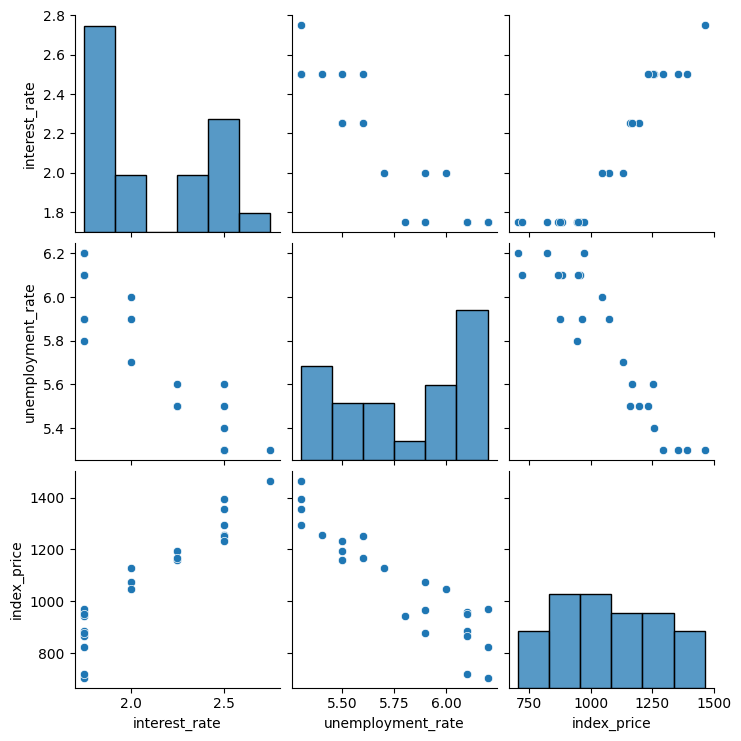

In [62]:
# visualization
import seaborn as sns
sns.pairplot(df_index)

In [63]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

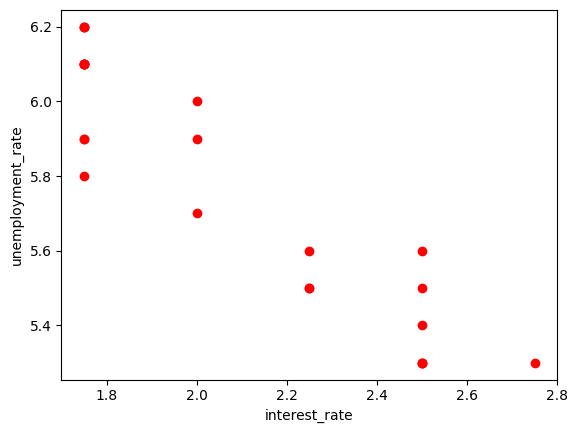

In [64]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [65]:
X  = df_index.iloc[:,:-1]
y  = df_index.iloc[:,-1]

In [66]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [67]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [68]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [69]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

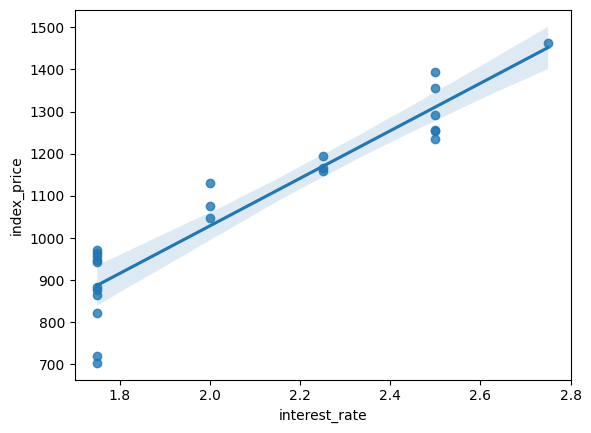

In [108]:
sns.regplot(
    x=df_index['interest_rate'],
    y=df_index['index_price']
)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

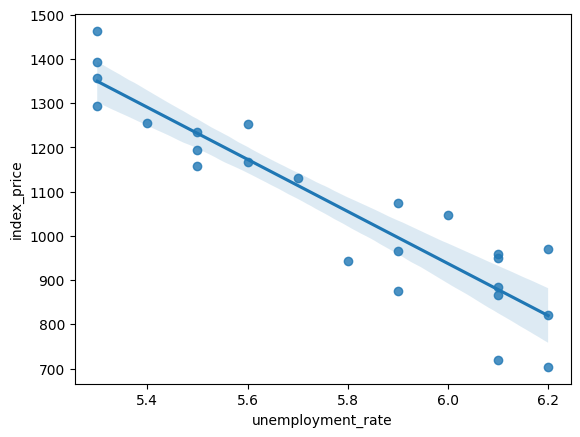

In [71]:
sns.regplot(
    x=df_index['unemployment_rate'],
    y=df_index['index_price']
)

In [72]:
# standarization 
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [75]:
# Apply simple linear Regression
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression()

In [77]:
regression.fit(X_train, y_train)

LinearRegression()

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
validation_score = cross_val_score(regression, X_train, y_train,scoring='neg_mean_squared_error', cv=3 )

In [80]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [81]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [82]:
# prediction
y_pred = regression.predict(X_test)

In [83]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [84]:
# Performance matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [86]:
print("Mean squared error:",mse)
print("Mean absolute error:",mae)
print("Root mean squared error:",rmse)

Mean squared error: 5793.762887712569
Mean absolute error: 59.935781523235484
Root mean squared error: 76.11677139574805


In [87]:
# r^2 and adjusted r^2

In [88]:
from sklearn.metrics import r2_score

In [89]:
score = r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [90]:
# adjusted r^2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

## Assumptions

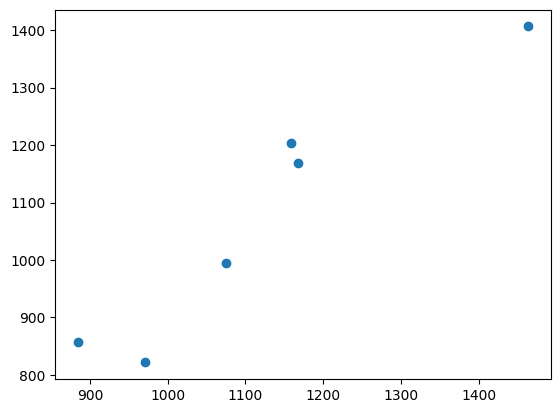

In [91]:
plt.scatter(y_test, y_pred)

In [93]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


## plot this residuals

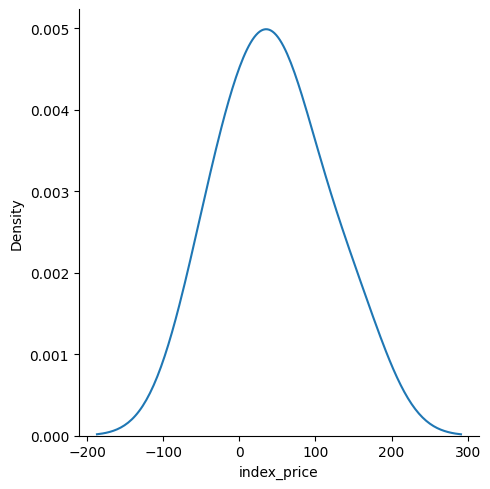

In [95]:
sns.displot(residuals, kind='kde')

## scatter plot with respect to prediction and residuals

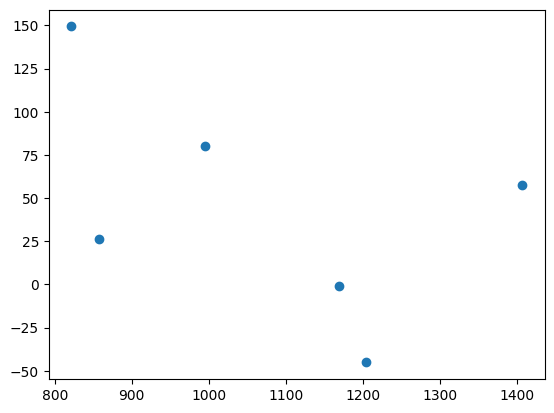

In [98]:
plt.scatter(y_pred, residuals)

In [102]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
# OLS Linear Regression
import statsmodels.api as sm

In [104]:
model=sm.OLS(y_train, X_train).fit()

In [106]:
model.summary()

C:\Users\singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 03 Feb 2026   Prob (F-statistic):                       0.754
Time:                        22:47:16   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
print("Coefficient or Slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or Slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443
